# DATA SCIENCE PROJECT on Google Play Apps

Hello World! Im Siddarth Aanant, a 12th grade student studying in Mumbai.As an aspiring software engineer, I have always been fascinated by how Apps and Programs perform well. For this project I have chosen Google Play Store because  Android is currently more popular and has more users than IOS. The following is a study to identify which features and characteristics are important for an app to become popular.

# Data Preprocessing

## Importing the Libraries

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import streamlit as st

## Exploring the data

In [98]:
dataset = pd.read_csv('/Users/anand/Desktop/Google-Play-Details/googleplaystore.csv')
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [99]:
dataset.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [100]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [102]:
dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Thus we can see that most of the data is catagorical, hence we need to use classification models.

## Preprocessing

### Removing the NAN values

In [103]:
dataset.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [104]:
#nan removal by mean strategy
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan , strategy = 'median')
data = dataset[['Rating']]
dataset['Rating'] = imp.fit_transform(data)
dataset.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [105]:
dataset.dropna(axis = 0 , how = 'any' , thresh = None , subset = None , inplace = True)
dataset.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [106]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Converting the Data to the Appropriate forms
Not encoding the data, just converting to appropriate numerical types
Will be doing more of this in LABEL ENCODING

In [107]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [108]:
#Reviews
dataset['Reviews'] = dataset['Reviews'].astype(float)

In [109]:
#installs
dataset['Installs'] = [int(i[:-1].replace(',','')) for i in dataset['Installs']]

In [110]:
#Size
def size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
dataset["Size"] = dataset["Size"].map(size)

In [111]:
#prices
def price(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price
dataset['Price'] = dataset['Price'].map(price).astype(float)

## Data Visualization

In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  float64
 4   Size            9135 non-null   float64
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.2+ MB


### Apps with the highest installs

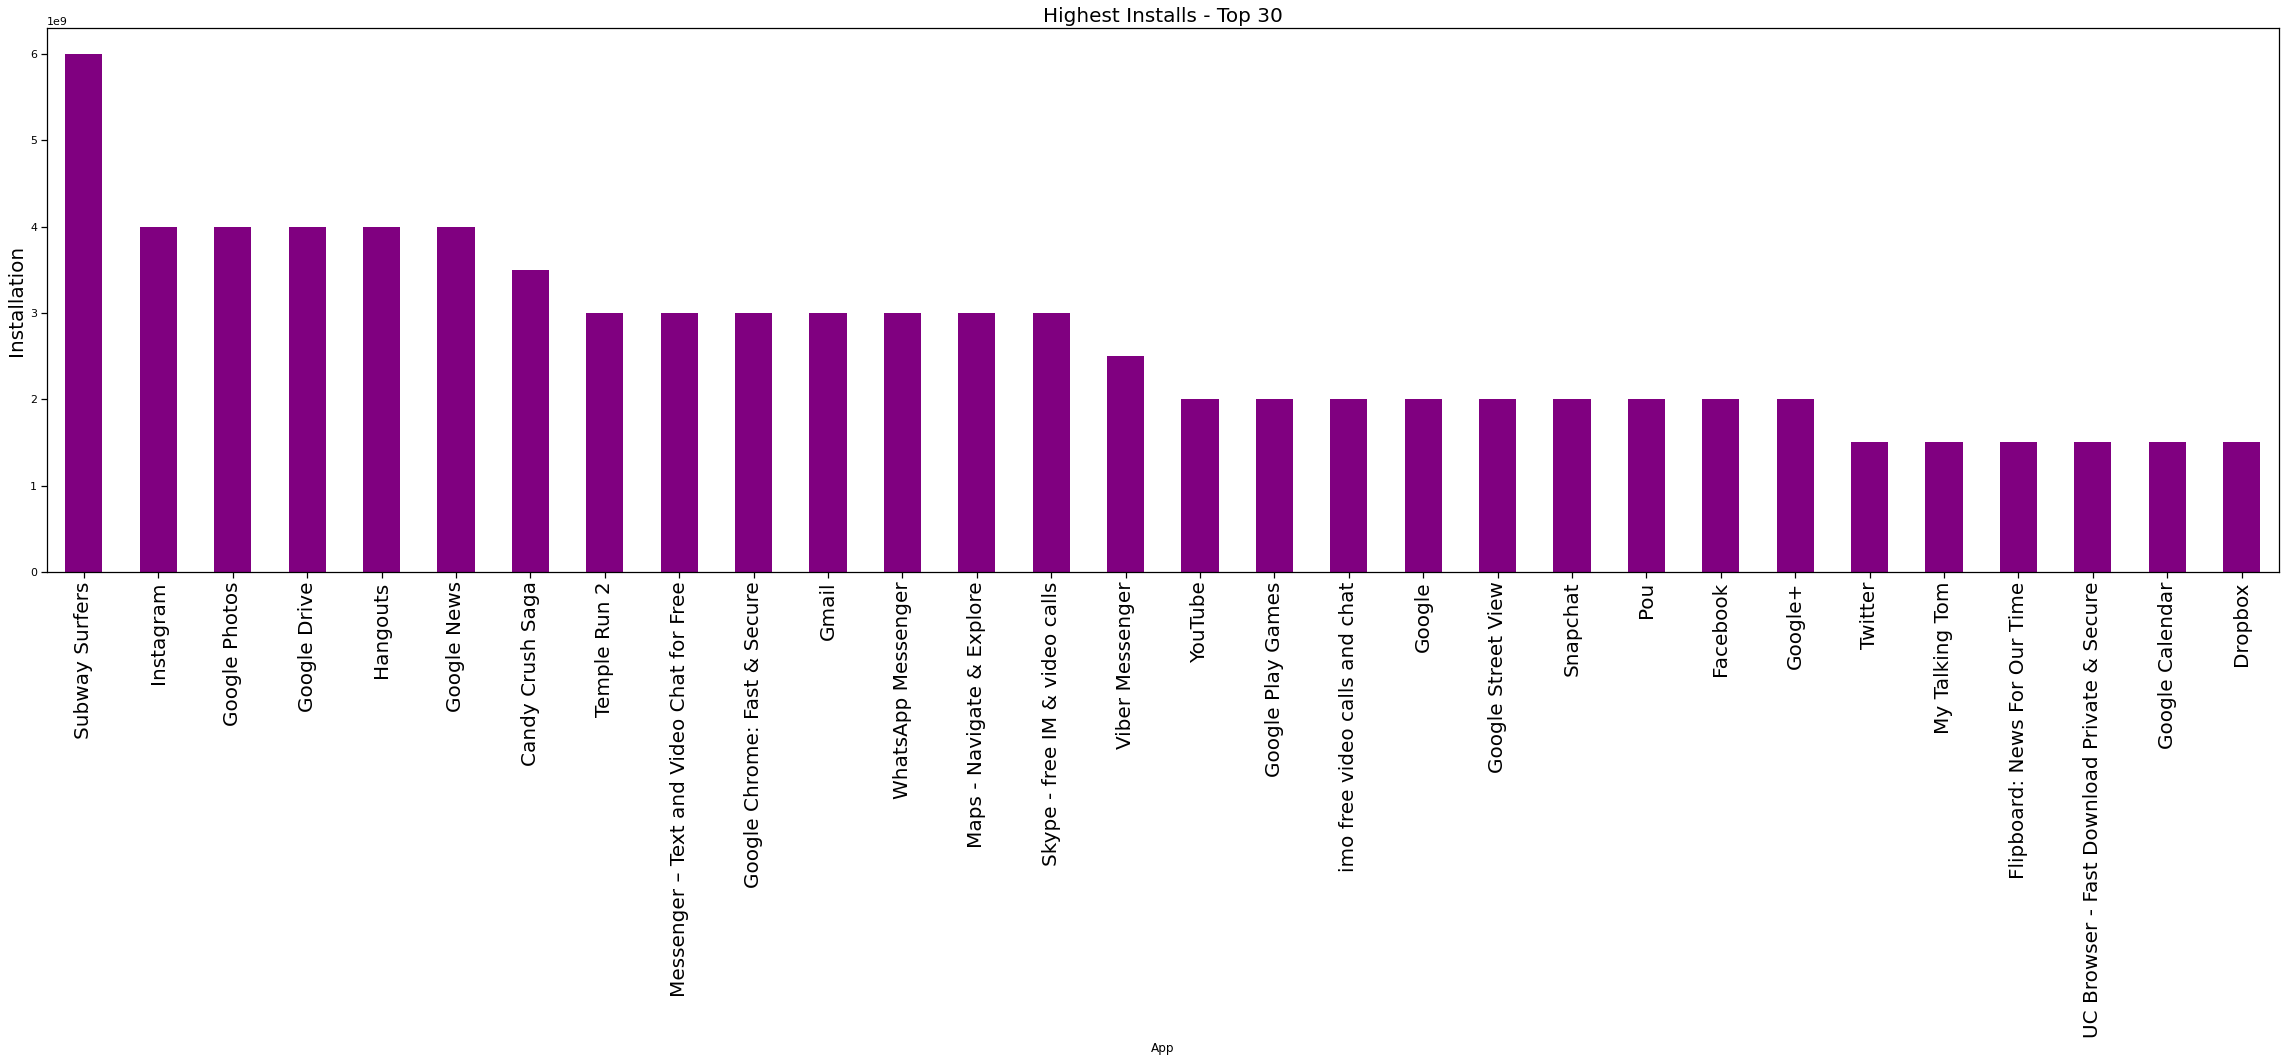

In [113]:
r = dataset.groupby('App')['Installs'].sum().reset_index()
fr = r.sort_values(by = 'Installs' , ascending = False).head(30)
ind = fr.set_index("App" , inplace = True)
bar = fr.plot(kind='bar',figsize=(40, 10), color = "purple", legend = None)
plt.xticks(rotation = 90 , fontsize = 20)
plt.ylabel("Installation" , fontsize = 20)
plt.title("Highest Installs - Top 30" , fontsize = 20)
plt.show()

### Most Popular Category

Text(0, 0.5, 'Installs')

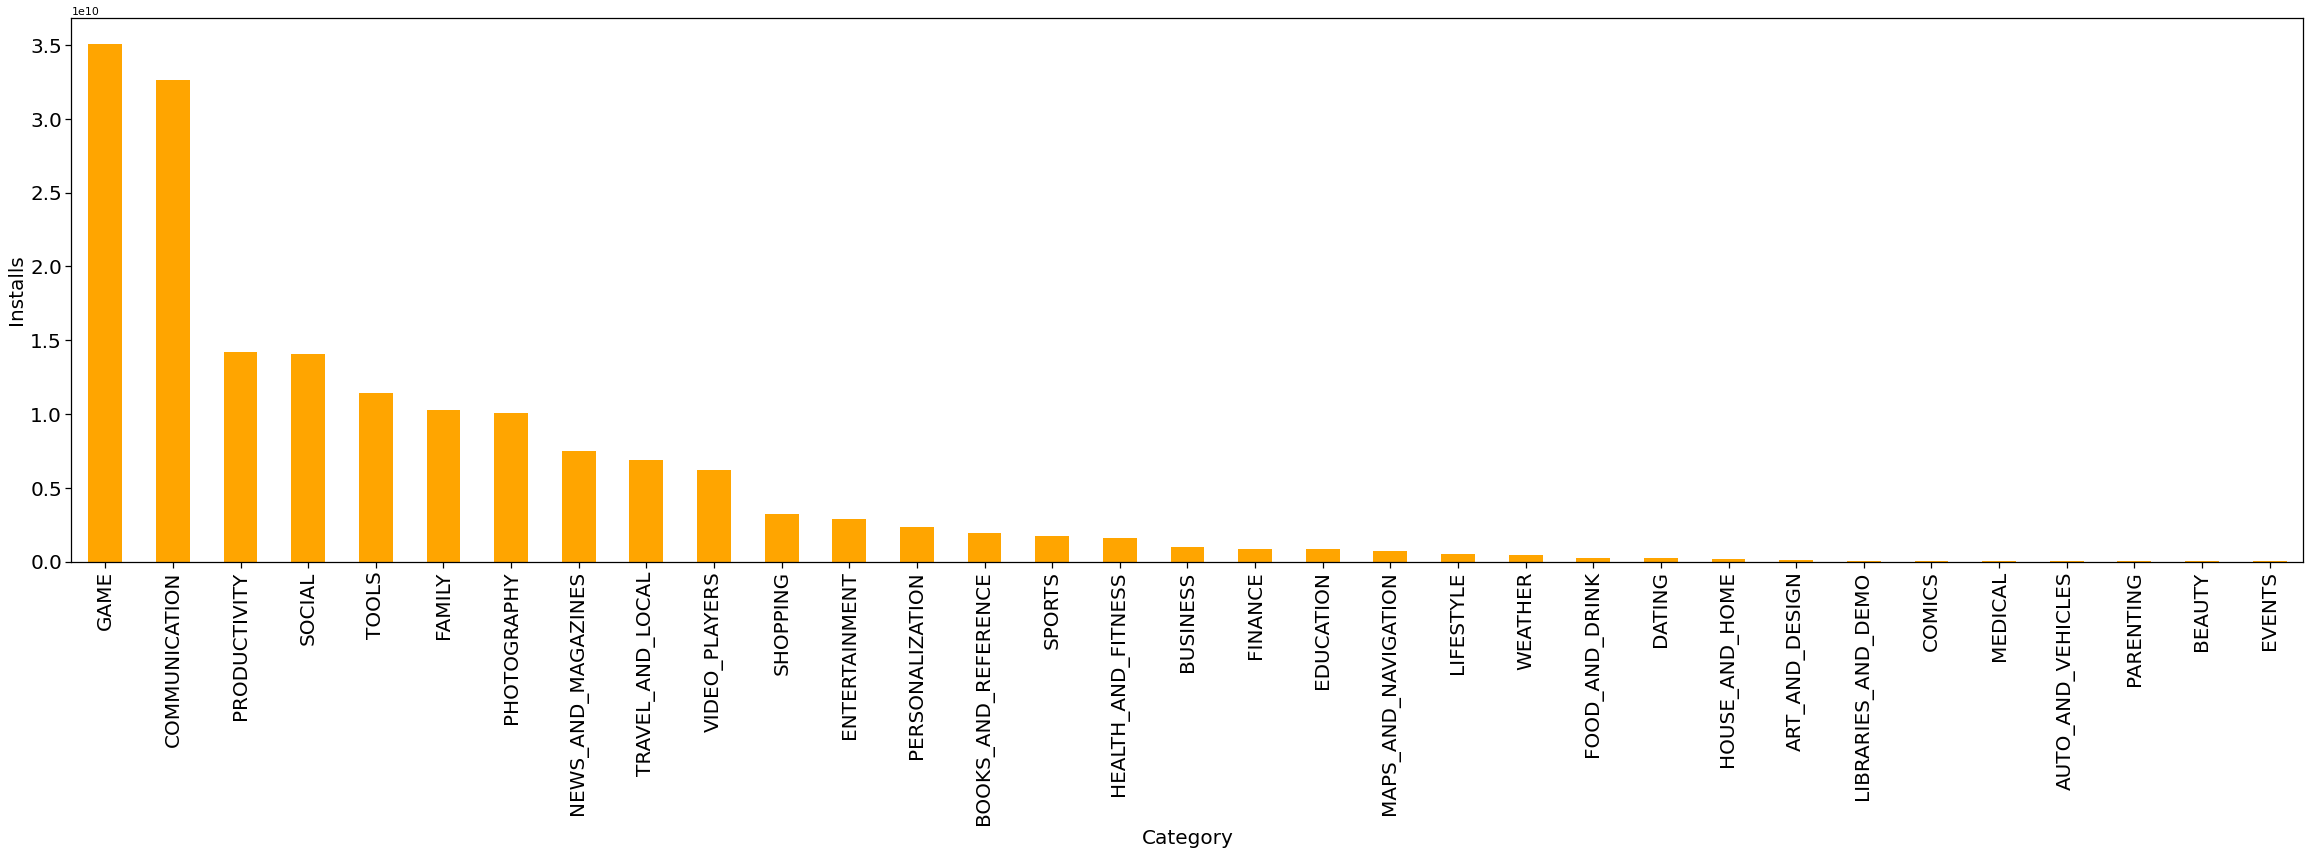

In [114]:
r = dataset.groupby('Category')['Installs'].sum().reset_index()
fr = r.sort_values('Installs', ascending=False).reset_index(drop=True)
ind = fr.set_index("Category" , inplace = True)
bar = fr.plot(kind='bar',figsize=(40, 10), color = "orange", legend = None)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Installs", fontsize = 20)

Note : Thus the most popular app and category is GAME

The number of installations are in millions.

### Size of app compared to the installs

Text(0, 0.5, 'Size')

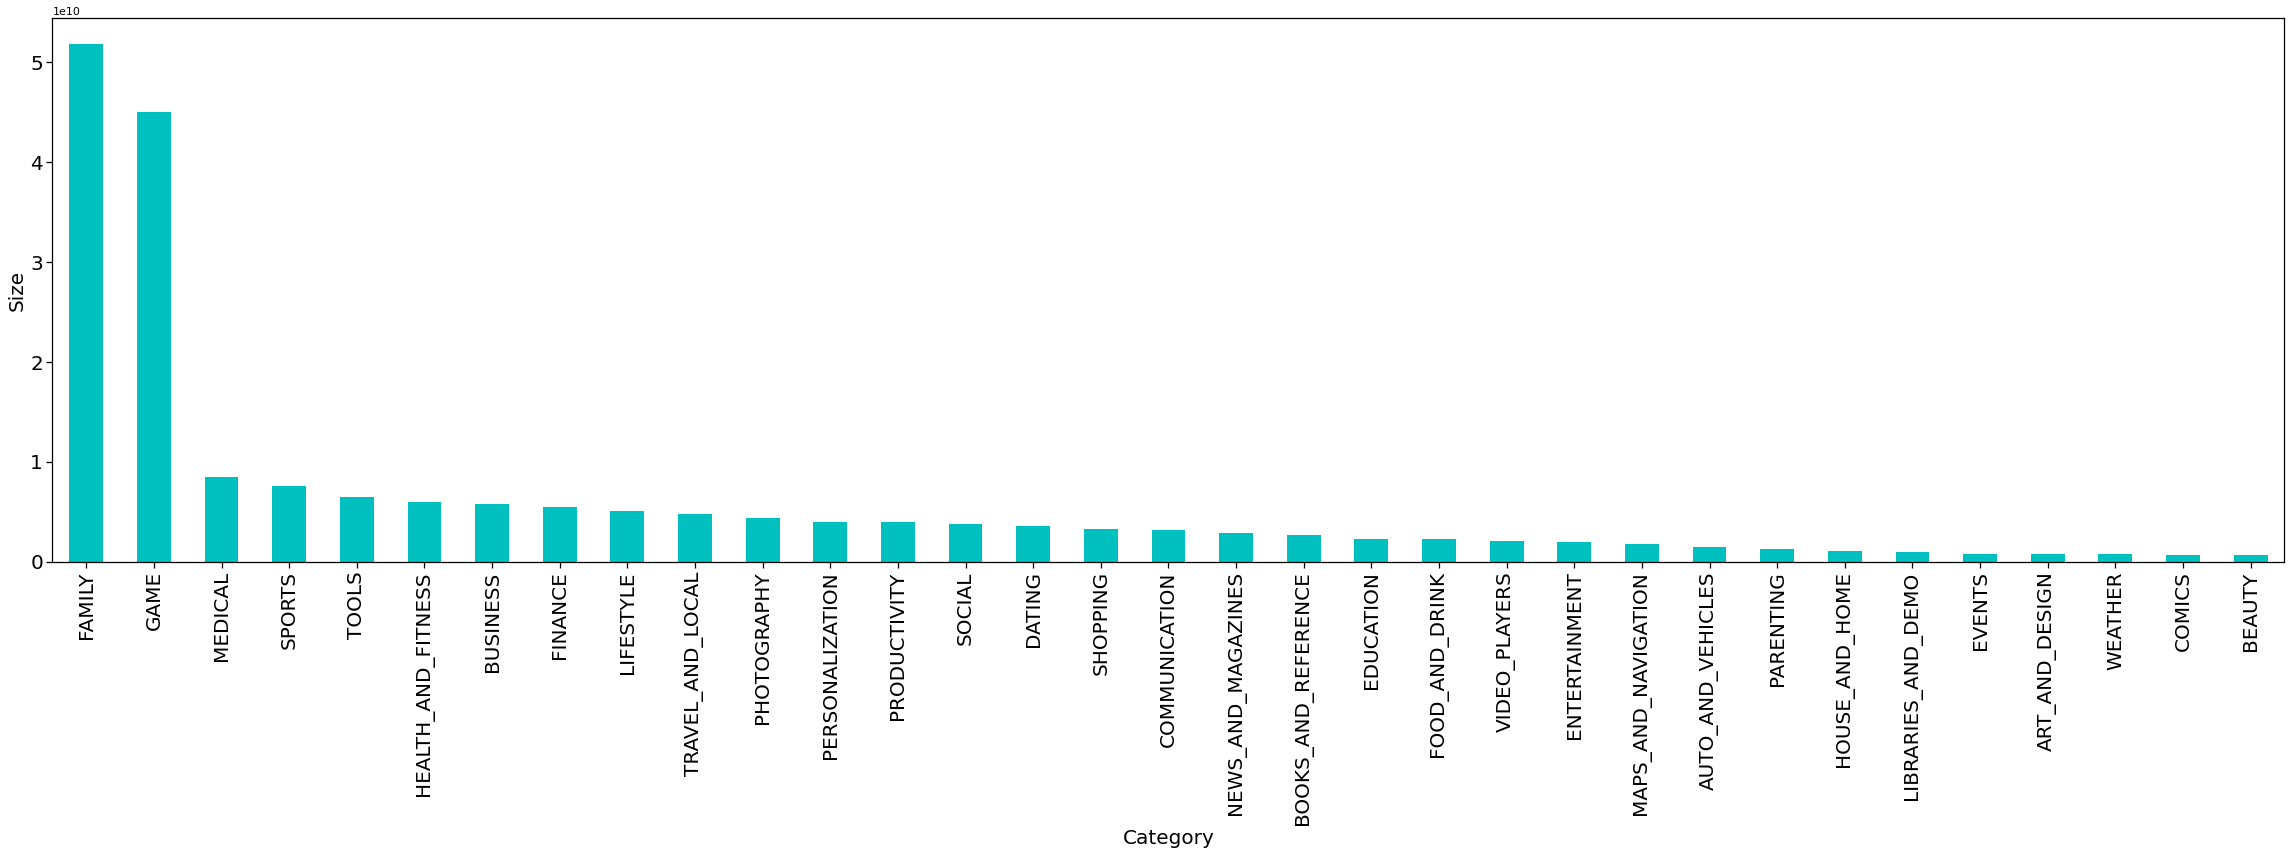

In [115]:
r = dataset.groupby('Category')['Size'].sum().reset_index()
fr = r.sort_values('Size', ascending=False).reset_index(drop=True)
index = fr.set_index("Category" , inplace = True)
bar = fr.plot(kind='bar',figsize=(40, 10), color = 'c', legend = None)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Size", fontsize = 20)

### Cost and Installs

Text(0, 0.5, 'Installs')

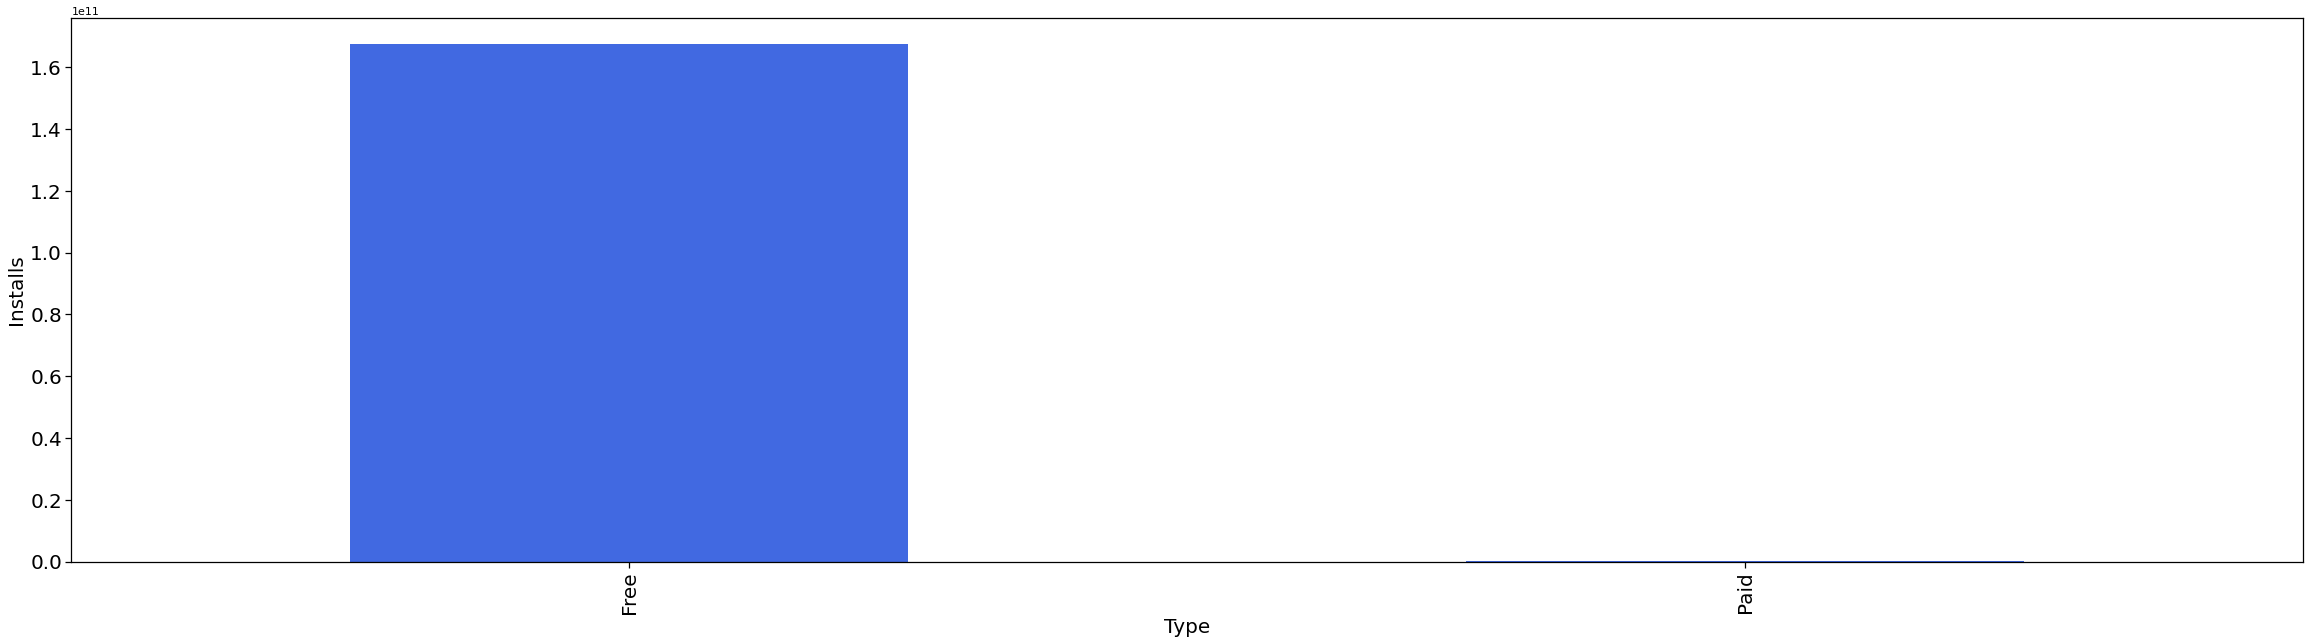

In [116]:
r = dataset.groupby('Type')['Installs'].sum().reset_index()
fr = r.sort_values('Installs', ascending=False).reset_index(drop=True)
ind = fr.set_index("Type" , inplace = True)
bar = fr.plot(kind='bar',figsize=(40, 10), color = "royalblue", legend = None)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel("Type", fontsize = 20)
plt.ylabel("Installs", fontsize = 20)

Text(0, 0.5, 'Installs')

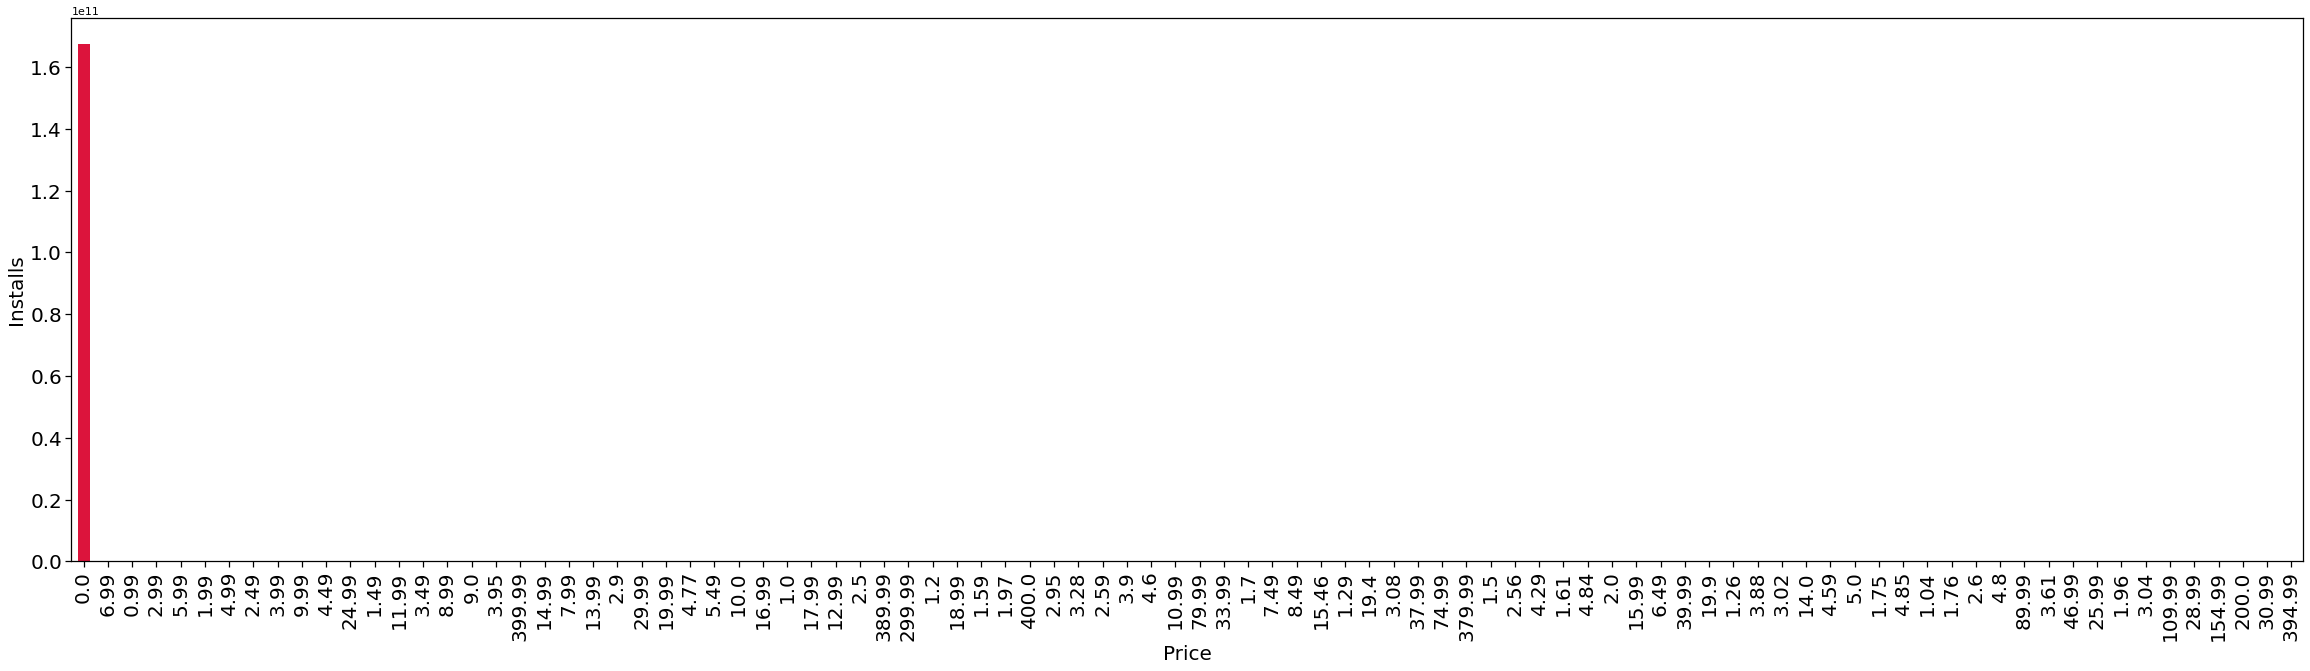

In [117]:
r = dataset.groupby('Price')['Installs'].sum().reset_index()
fr = r.sort_values('Installs', ascending=False).reset_index(drop=True)
ind = fr.set_index("Price" , inplace = True)
bar = fr.plot(kind='bar',figsize=(40, 10), color = "crimson", legend = None)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel("Price", fontsize = 20)
plt.ylabel("Installs", fontsize = 20)

While there are paid apps their number in comparison is negligible.

### Content Rating and Installs

Text(0, 0.5, 'Installs')

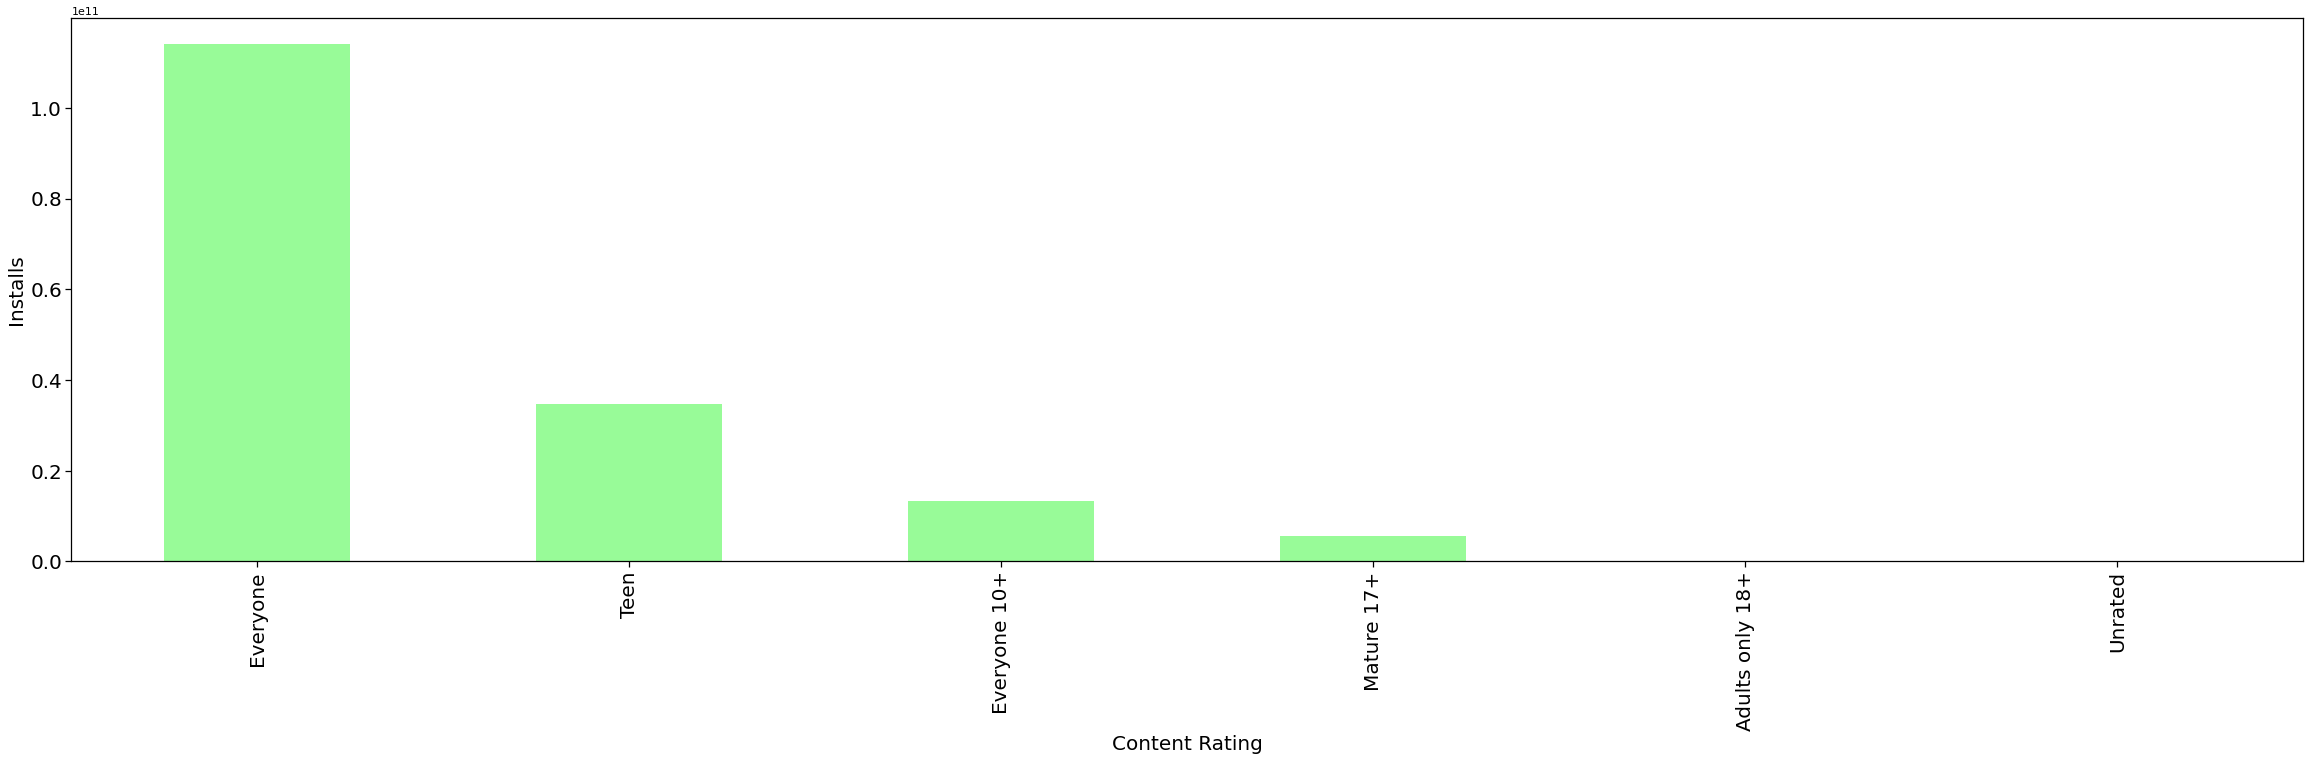

In [118]:
r = dataset.groupby('Content Rating')['Installs'].sum().reset_index()
fr = r.sort_values('Installs', ascending=False).reset_index(drop=True)
ind = fr.set_index("Content Rating" , inplace = True)
bar = fr.plot(kind='bar',figsize=(40, 10), color = "palegreen", legend = None)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel("Content Rating", fontsize = 20)
plt.ylabel("Installs", fontsize = 20)

Thus a general target audience should be teenagers

Based on this we can see that though we have certain paid apps the number of downloaded is insignificant

### No. of Apps as per the Category 

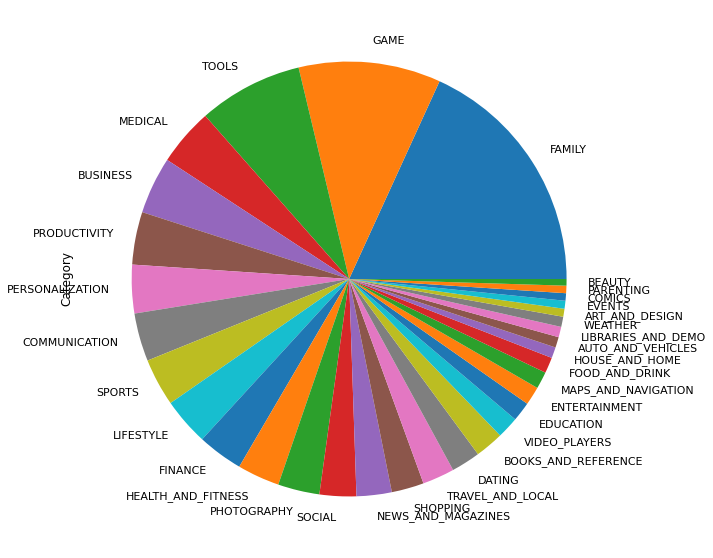

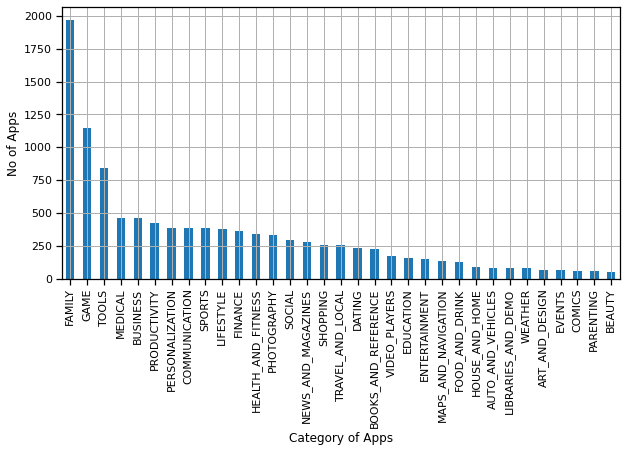

In [119]:
plt.figure(figsize = (10,10))
dataset["Category"].value_counts().plot(kind='pie')
plt.show()
plt.figure(figsize = (10,5))
dataset["Category"].value_counts().plot(kind='bar')
plt.ylabel("No of Apps")
plt.xlabel("Category of Apps")
plt.grid()
plt.show()

## Preparing the data for the machine learning model

In [120]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [121]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Final Cleaning

### Removing Uncessary columns

In [122]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [123]:
#removing these columns as thay may not majorly influence the prediction
#removing them as they cause high runtime after encoding
del dataset['App']
del dataset['Last Updated']
del dataset['Genres']
del dataset['Current Ver']
del dataset['Android Ver']

In [124]:
dataset.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating'],
      dtype='object')

### Label Encoding

In [125]:
df = pd.get_dummies(dataset)
df.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159.0,19000000.0,10000,0.0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,3.9,967.0,14000000.0,500000,0.0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,4.7,87510.0,8700000.0,5000000,0.0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,4.5,215644.0,25000000.0,50000000,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4.3,967.0,2800000.0,100000,0.0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### Cleaning Unecessary Characters

In [126]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

### Removing the nan values

In [127]:
df = df.astype('float64')

In [128]:
np.any(np.isnan(df)) # error while running the firt time

True

In [129]:
df.fillna(df.mean(), inplace=True)

In [130]:
np.any(np.isnan(df))

False

In [131]:
np.all(np.isfinite(df))

True

# Machine Learning

## Target Variable

#### To study what factors help in giving an app the MAXIMUM NUMBER OF INSTALLATIONS

### Splitting the dataset

In [132]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Installs']) #given data
y = df[ ["Installs"] ] #target

In [133]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42)

In [134]:
X.head()

,Rating,Reviews,Size,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159.0,19000000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.9,967.0,14000000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.7,87510.0,8700000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.5,215644.0,25000000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.3,967.0,2800000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [135]:
y.head()

,Installs
0,10000.0
1,500000.0
2,5000000.0
3,50000000.0
4,100000.0


### Converting to single dimention

In [136]:
y_train = np.ravel(y_train)
y_train

array([1.e+07, 5.e+06, 1.e+01, ..., 5.e+06, 5.e+06, 1.e+02])

Since all the target variable is numerical, using regressor algorithms

## Multiple Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Prediction

In [138]:
y_pred = regressor.predict(X_test)
y_pred

array([   74499.82039062,  1230541.98334992, -6685124.33800793, ...,
        9105507.66396414,  1530931.01323697,  4034548.19739385])

### Scoring the Model

In [139]:
from sklearn.metrics import explained_variance_score
error = explained_variance_score(y_test , y_pred)
error 
#lower the value worse the model, best score is one.

0.5232038663422511

The accuracy is low and hence its not a fit model

## Support Vector Regression

### Training the SVR model 

In [140]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

### Predicting a new result

In [141]:
from sklearn.preprocessing import StandardScaler
y_pred = regressor.predict(X_test)
y_pred

array([ 99992.05891628, 100371.79313599,  99838.75933269, ...,
       100567.61851817, 100691.1980538 , 100730.70872641])

### Scoring the results

In [142]:
from sklearn.metrics import explained_variance_score
error = explained_variance_score(y_test , y_pred)
error 
#lower the value worse the model, best score is one.

6.970936311523346e-07

There is some error as the score should not cross one, this model too is wrong

## Random Forest Regressor

### Training the model

In [143]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

### Predicting the results

In [144]:
y_pred = regressor.predict(X_test)
y_pred

array([2.15e+05, 1.00e+06, 4.50e+05, ..., 1.11e+07, 3.50e+03, 1.80e+06])

### Scoring the model

In [145]:
from sklearn.metrics import explained_variance_score
error = explained_variance_score(y_test , y_pred)
error 
#lower the value worse the model, best score is one.

0.8874417304821922

The accuracy is ok, but it can still be better. Hence this model is not fit.

## Decision Tree Regressor

### Training the machine learning model

In [146]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Predicting the result

In [147]:
y_pred = regressor.predict(X_test)
y_pred

array([1.e+05, 1.e+06, 1.e+05, ..., 1.e+07, 5.e+03, 1.e+06])

### Scoring the model

In [148]:
from sklearn.metrics import explained_variance_score
error = explained_variance_score(y_test , y_pred)
error 
#lower the value worse the model, best score is one.

0.9157858346744806

This model has a good accuracy, hence its fit

## Xgboost model

### Training the Model

In [149]:
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators=5000 , learning_rate=0.03 , eta = 0.003)
reg.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.003, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Predicting the Test set results

In [150]:
y_pred = reg.predict(X_test)
y_pred

array([ 179101.58, 2593015.  ,  810586.56, ..., 6276716.  ,   32911.17,
       1128850.9 ], dtype=float32)

### Scoring the model

In [151]:
from sklearn.metrics import explained_variance_score
error = explained_variance_score(y_test , y_pred)
error

0.9501847117720701

This model has the best accuracy and is hence the ideal model

# Conclusion

## Model : 

The ideal model is using XG Boost Algorithm

### Accuracy

In [152]:
reg.score(X_test , y_test) #gives us the r2 score

0.9501688228289827

Based on the r2_score and explained Variance Score of the model, which is out of one we can conclude that the Accuracy is approximately 95%

## Important Factors

In [153]:
reg.get_booster().get_score(importance_type="weight")

{'Reviews': 86679,
 'Category_TOOLS': 2886,
 'Category_FINANCE': 706,
 'Rating': 34148,
 'Content Rating_Mature 17+': 630,
 'Category_BUSINESS': 797,
 'Category_PRODUCTIVITY': 2079,
 'Size': 20768,
 'Content Rating_Everyone 10+': 785,
 'Category_VIDEO_PLAYERS': 701,
 'Category_NEWS_AND_MAGAZINES': 526,
 'Content Rating_Teen': 1589,
 'Category_COMMUNICATION': 1381,
 'Category_HEALTH_AND_FITNESS': 659,
 'Category_FAMILY': 2083,
 'Category_TRAVEL_AND_LOCAL': 538,
 'Category_SOCIAL': 723,
 'Content Rating_Everyone': 2197,
 'Category_GAME': 1893,
 'Category_PHOTOGRAPHY': 974,
 'Category_BOOKS_AND_REFERENCE': 527,
 'Category_ENTERTAINMENT': 629,
 'Category_SHOPPING': 555,
 'Category_PERSONALIZATION': 563,
 'Price': 668,
 'Category_MAPS_AND_NAVIGATION': 336,
 'Category_SPORTS': 741,
 'Category_WEATHER': 453,
 'Category_COMICS': 219,
 'Category_LIFESTYLE': 285,
 'Category_EDUCATION': 231,
 'Category_FOOD_AND_DRINK': 169,
 'Category_AUTO_AND_VEHICLES': 86,
 'Category_LIBRARIES_AND_DEMO': 106,
 

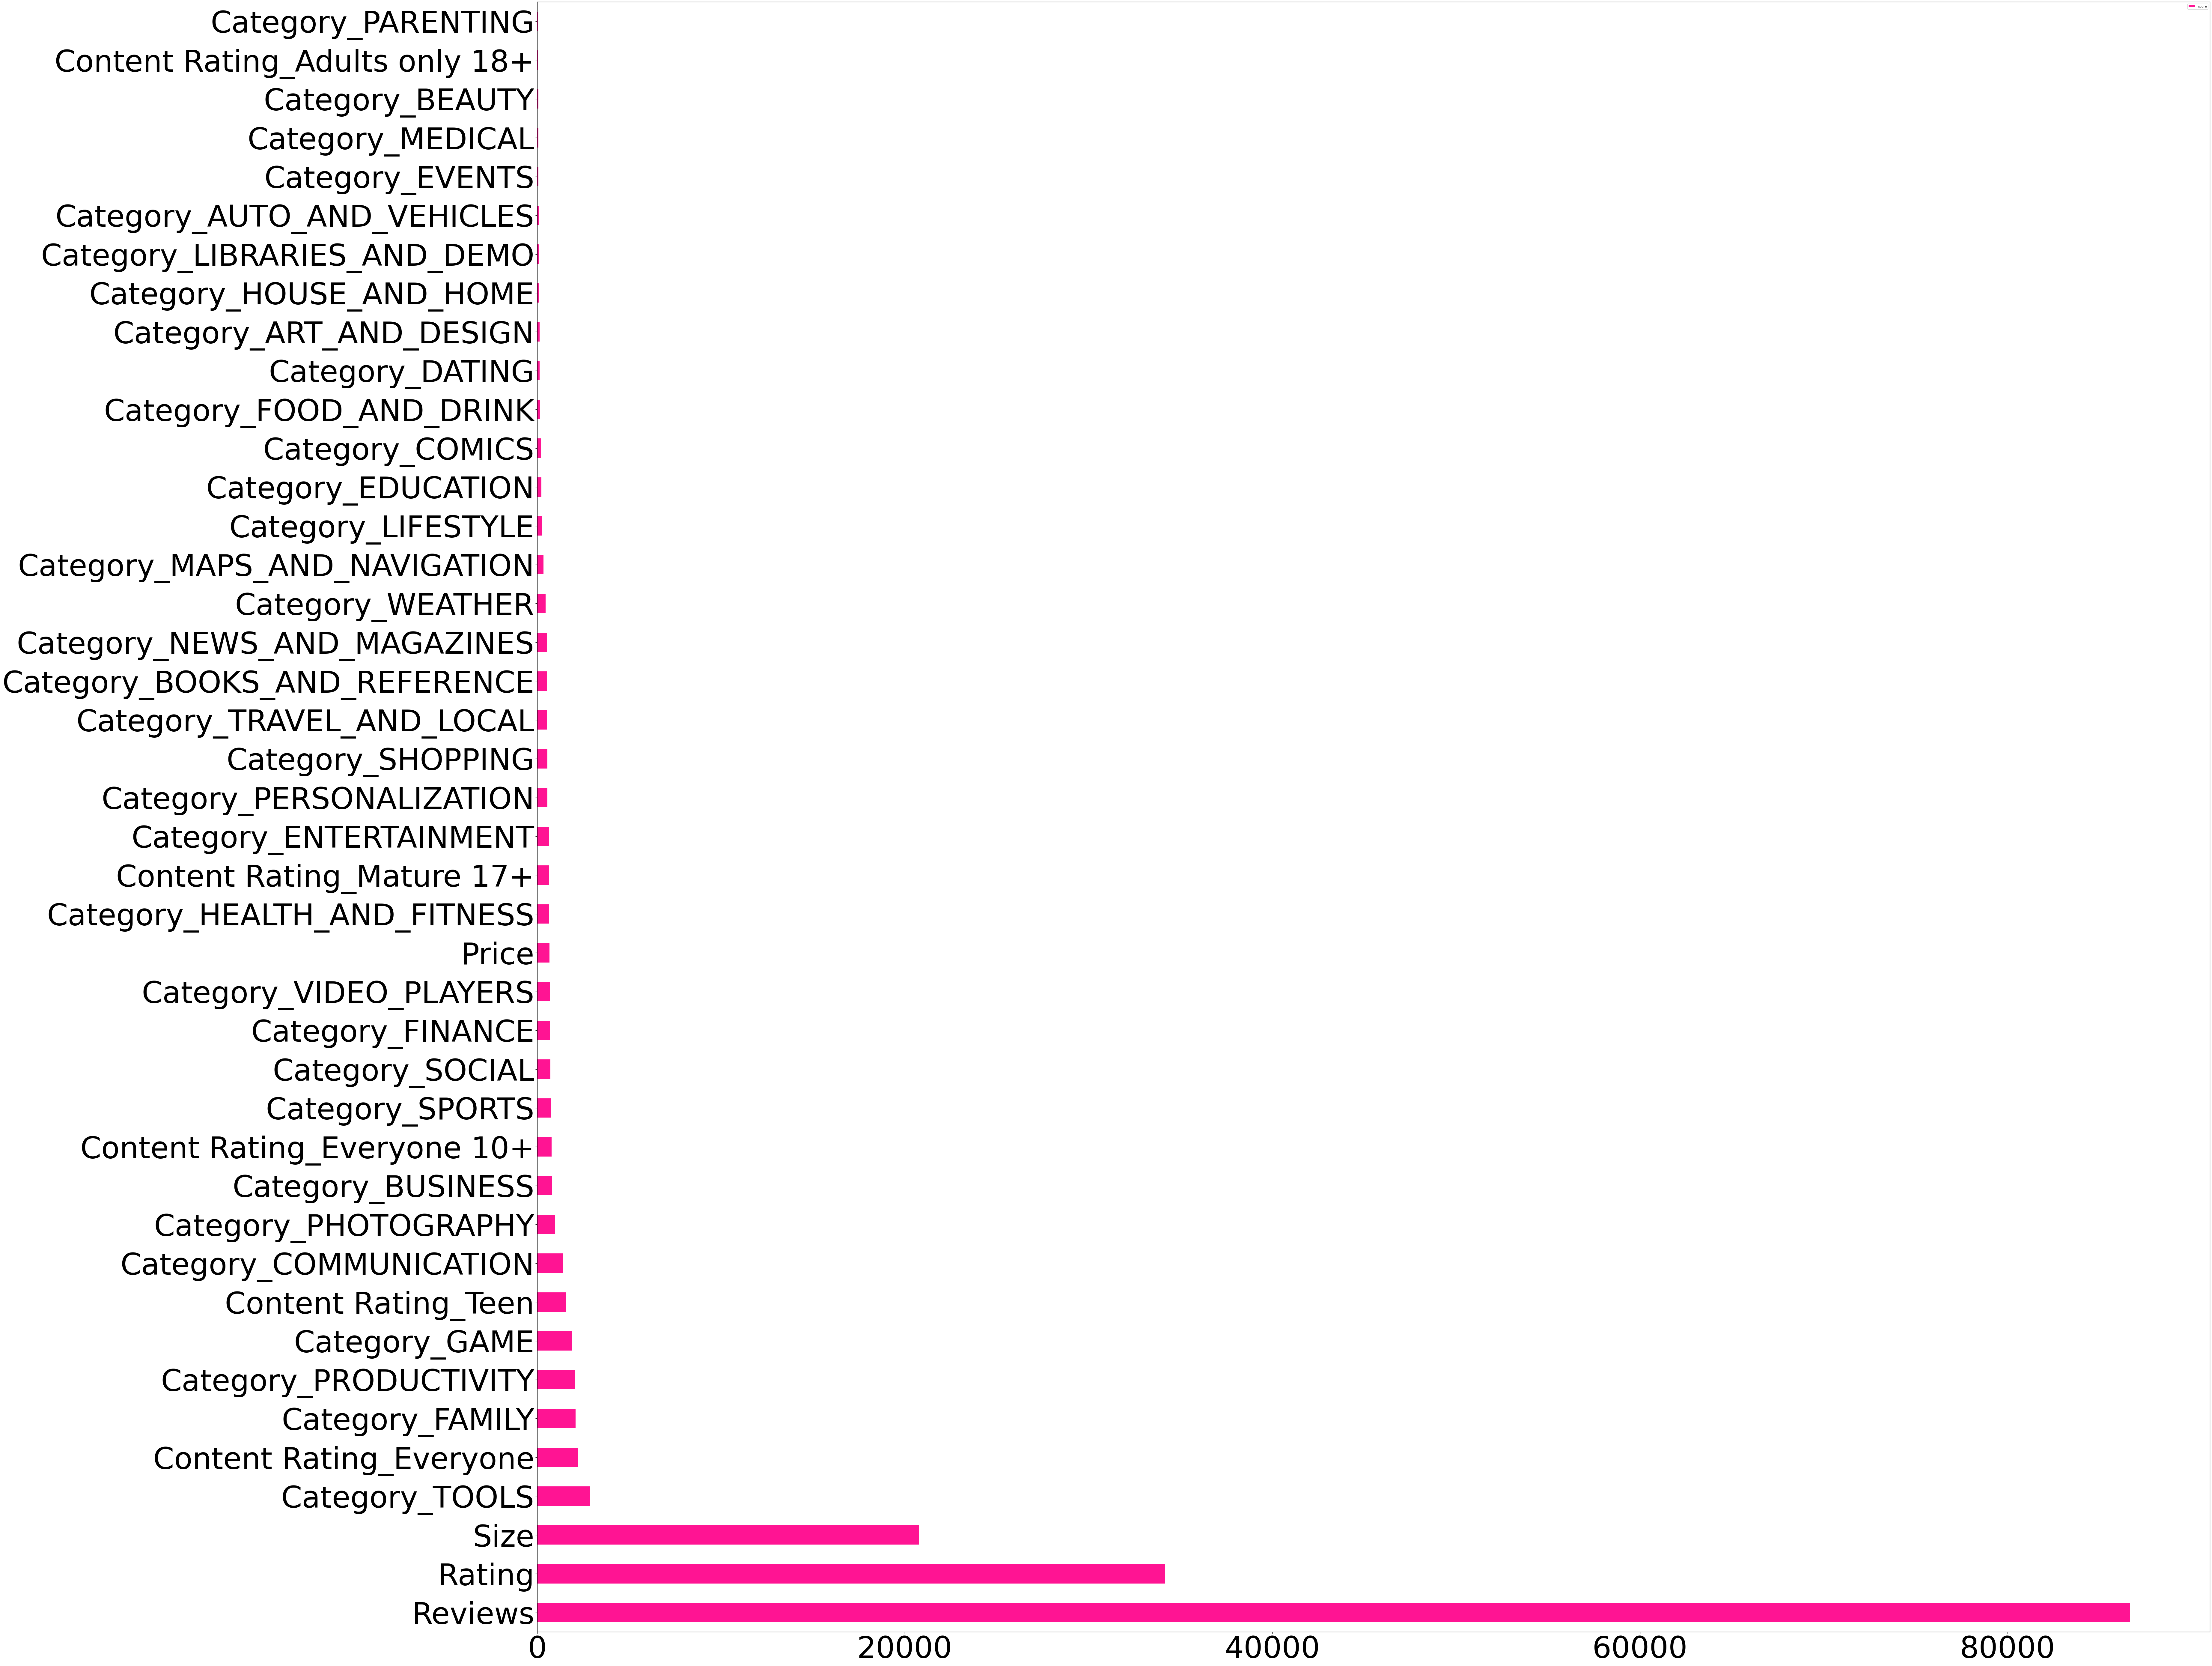

In [154]:
feature_important = reg.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
df = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
df.plot(kind='barh' , figsize = (100,100) , fontsize = 100 , color = 'deeppink')

## Observations

Games are the most popular and fetch the most downloades

The most popular app is Subway Surfer, which is a free game

Free apps are more popular than paid apps

Teenagers Review Contribute to the Number of Installs by a Significant Percent

The reviews contribute the most to the number of intalls

To predict the no. of downloades and installs , the above made XGboost is ideal for this dataset